# E-commerce Churn Prediction

Dataset: [Link](https://www.kaggle.com/datasets/shriyashjagtap/e-commerce-customer-for-behavior-analysis?)

In [1]:
# basics
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [68]:
# sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mutual_info_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
# stats
from scipy.stats import chi2_contingency

## Step 1: Load & Explore the Dataset

In [5]:
data = '../data/e-commerce-dataset.csv'

In [6]:
df = pd.read_csv(data, sep=';')

In [7]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [8]:
df.shape

(5630, 20)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [10]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [11]:
columns = df.columns.values
print(columns)

['CustomerID' 'Churn' 'Tenure' 'PreferredLoginDevice' 'CityTier'
 'WarehouseToHome' 'PreferredPaymentMode' 'Gender' 'HourSpendOnApp'
 'NumberOfDeviceRegistered' 'PreferedOrderCat' 'SatisfactionScore'
 'MaritalStatus' 'NumberOfAddress' 'Complain'
 'OrderAmountHikeFromlastYear' 'CouponUsed' 'OrderCount'
 'DaySinceLastOrder' 'CashbackAmount']


In [12]:
for col in columns:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")    
    print(df[col].value_counts(), "\n")

CustomerID 
--------------------
CustomerID
50001    1
53751    1
53759    1
53758    1
53757    1
        ..
51876    1
51875    1
51874    1
51873    1
55630    1
Name: count, Length: 5630, dtype: int64 

Churn 
--------------------
Churn
0    4682
1     948
Name: count, dtype: int64 

Tenure 
--------------------
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: count, dtype: int64 

PreferredLoginDevice 
--------------------
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64 

CityTier 
--------------------
CityTier
1    3666
3    1722


**Variable & Description**
- **CustomerID**: Unique customer ID
- **Churn**: Churn Flag
- **Tenure**: Tenure of customer in organization
- **PreferredLoginDevice**: Preferred login device of customer
- **CityTier**: City tier
- **WarehouseToHome**: Distance in between warehouse to home of customer
- **PreferredPaymentMode**: Preferred payment method of customer
- **Gender**: Gender of customer
- **HourSpendOnApp**: Number of hours spend on mobile application or website
- **NumberOfDeviceRegistered**: Total number of devices is registered on particular customer
- **PreferedOrderCat**: Preferred order category of customer in last month
- **SatisfactionScore**: Satisfactory score of customer on service
- **MaritalStatus**: Marital status of customer
- **NumberOfAddress**: Total number of addresses added on particular customer
- **Complain**: Any complaint has been raised in last month
- **OrderAmountHikeFromlastYear**: Percentage increases in order from last year
- **CouponUsed**: Total number of coupon has been used in last month
- **OrderCount**: Total number of orders has been places in last month
- **DaySinceLastOrder**: Day Since last order by customer
- **CashbackAmount**: Average cashback in last month

## Step 2: Data Cleaning

### 1. Check data types

In [13]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

**Observation**:


There are numerical columns that are presented as numerical columns, such as:
- CityTier
- NumberOfDeviceRegistered
- SatisfactionScore

In [14]:
cat_fix = ['CustomerID', 'CityTier', 'NumberOfDeviceRegistered', 'SatisfactionScore']
df[cat_fix] = df[cat_fix].astype('object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   object 
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   object 
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### 2. Check duplicates

In [16]:
df.duplicated().sum()

0

**Observation:**

There are no duplicates.

### 3. Check for nulls

In [17]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

**Observation:**

There are some numerical columns with nulls.

For numerical columns, we need to see the skewness to decide the imputation method.

**Identify Numeric Columns**

In [18]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns
numerical

Index(['Churn', 'Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [19]:
numerical = ['Tenure','WarehouseToHome','HourSpendOnApp',
             'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
             'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

**Visualize Skewness (Matplotlib)**

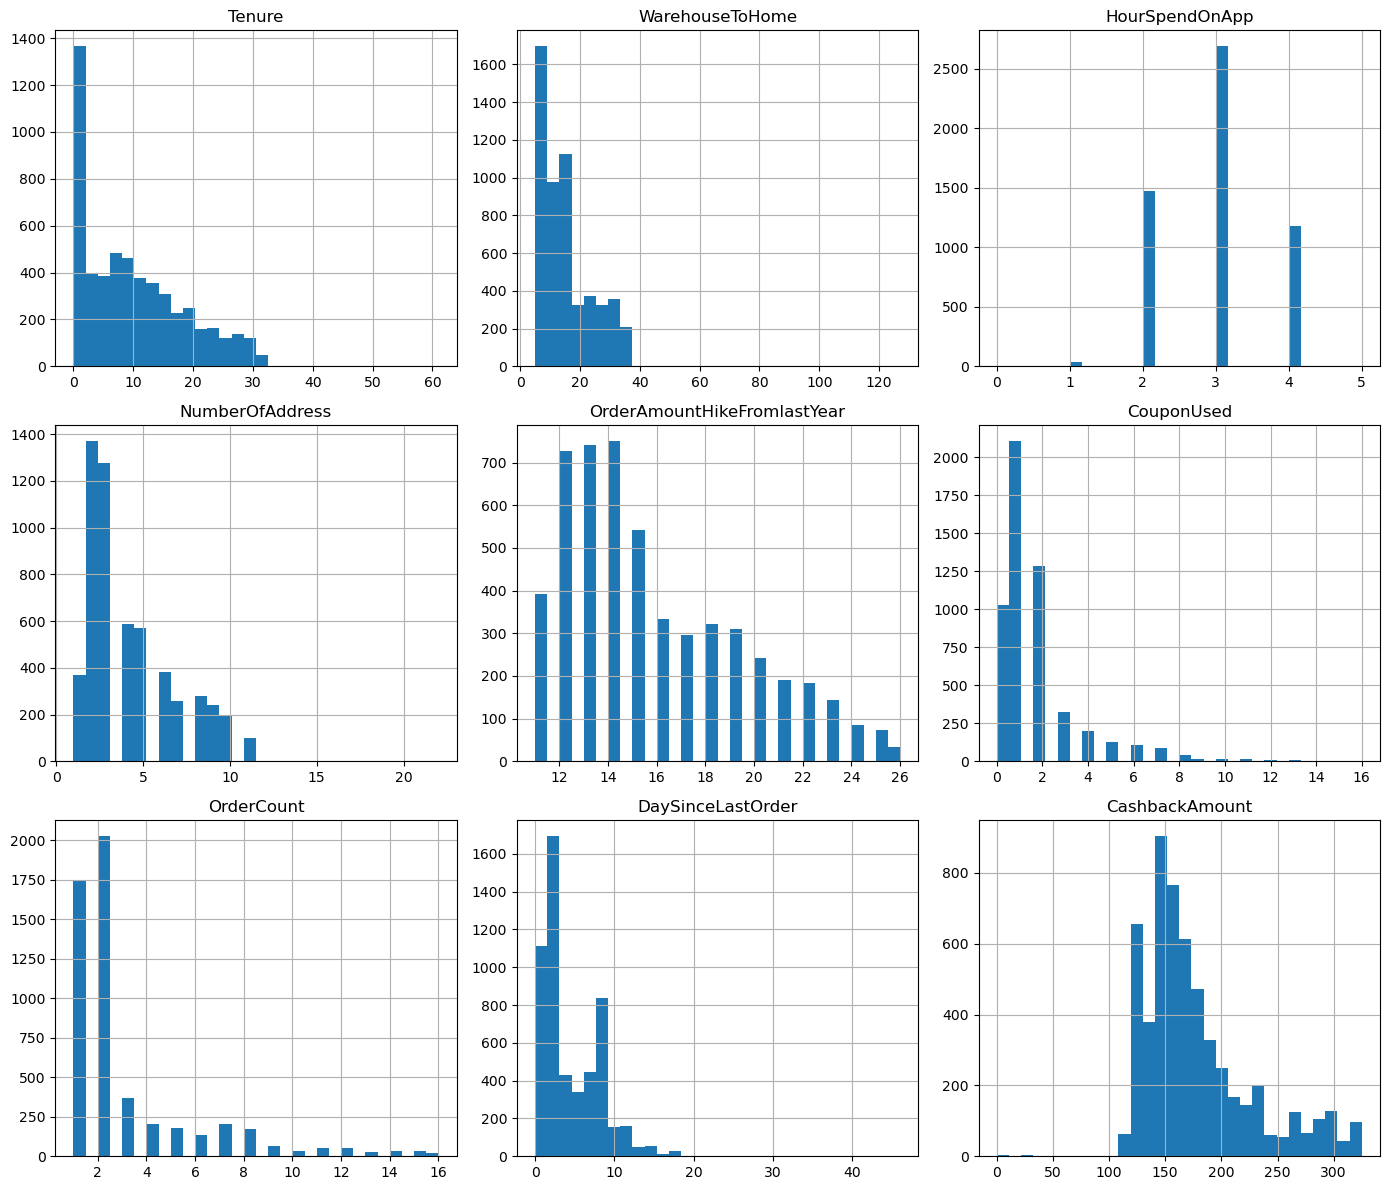

In [20]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)
    df[col].hist(bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

**Visualize Skewness (Seaborn KDE + Histogram)**

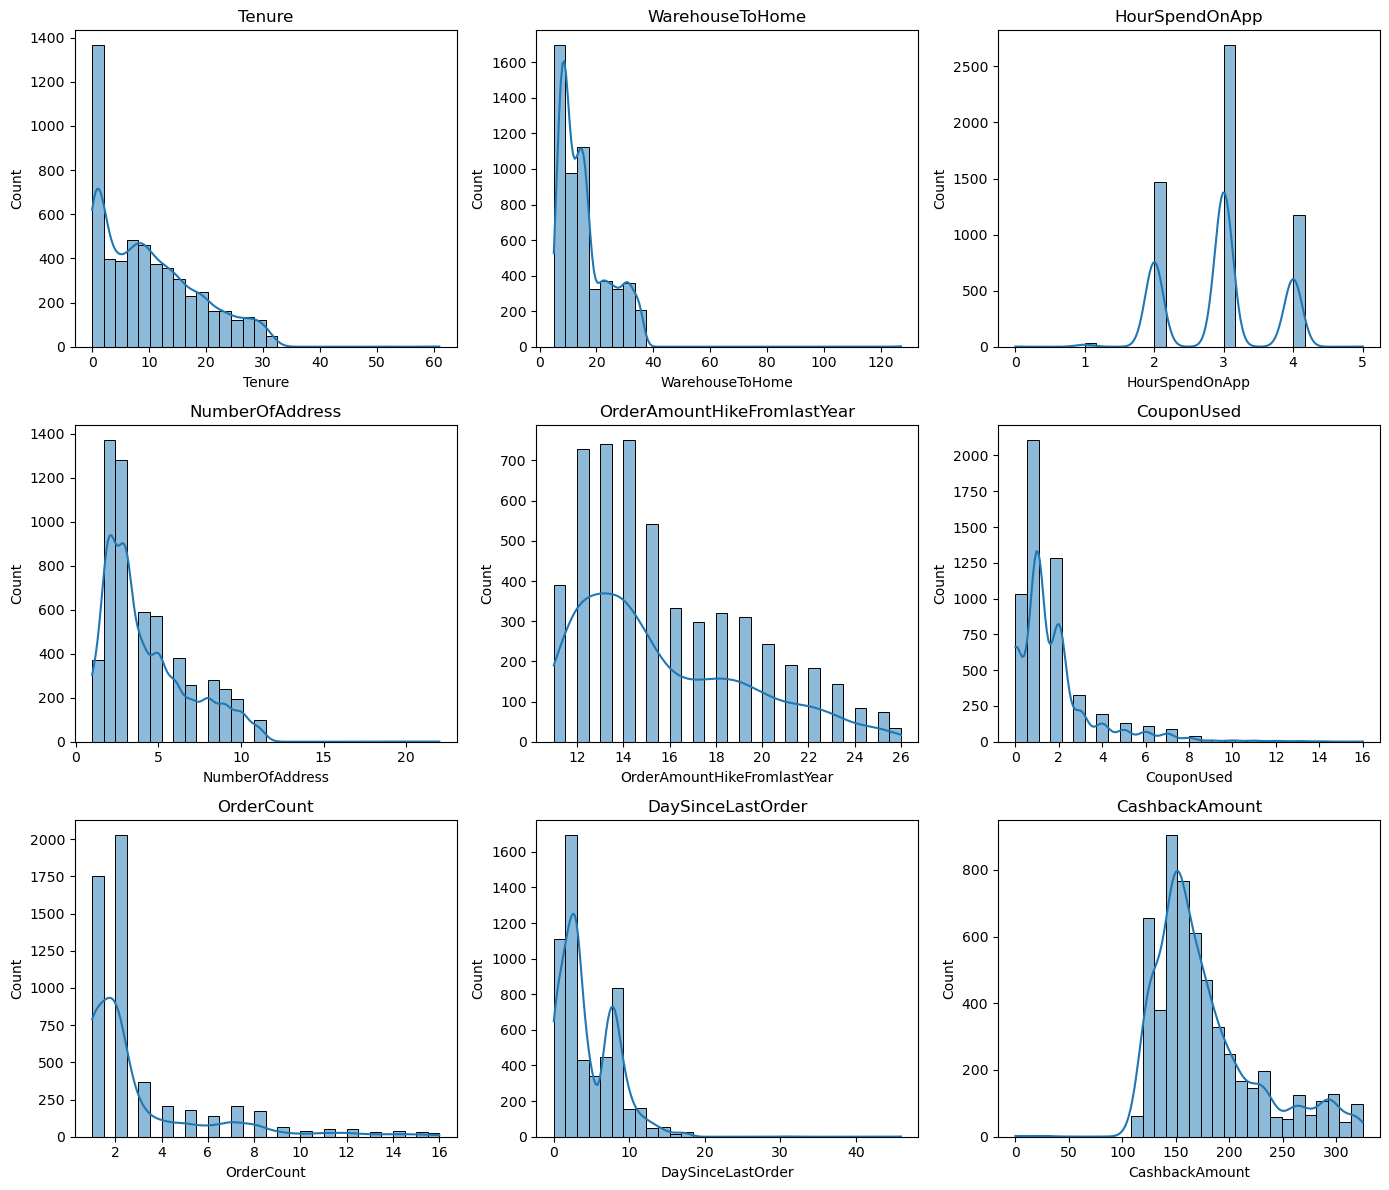

In [21]:
plt.figure(figsize=(14, 12))

for i, col in enumerate(numerical, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

**Generate Skewness Scores (Objective Check)**

In [22]:
df[numerical].skew().sort_values(ascending=False)

CouponUsed                     2.545653
OrderCount                     2.196414
WarehouseToHome                1.619154
DaySinceLastOrder              1.191000
CashbackAmount                 1.149595
NumberOfAddress                1.088639
OrderAmountHikeFromlastYear    0.790785
Tenure                         0.736513
HourSpendOnApp                -0.027213
dtype: float64

**Observation:**

Since the data are right-skewed, so we are going to impute using median.

**Fill nulls with median values**

In [23]:
numerical = ['Tenure','WarehouseToHome','HourSpendOnApp',
             'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed',
             'OrderCount', 'DaySinceLastOrder']

for col in numerical:
    df[col] = df[col].fillna(df[col].median())

In [24]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### 4. Check outliers

Since we already checking skewness, might as well deal with outliers too.



In [25]:
cols_to_log = ['CouponUsed', 'OrderCount', 'WarehouseToHome', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfAddress']

for col in cols_to_log:
    df[col] = np.log1p(df[col])

**Observation:**

Several numerical features (`CouponUsed`, `OrderCount`, `WarehouseToHome`, `DaySinceLastOrder`, `CashbackAmount`) were highly right-skewed due to the presence of customers with unusually high engagement or infrequent order activity. Instead of removing these values — which represent real customer behavior — we applied a `log(x+1)` transformation to reduce skew and stabilize model learning. Other features (`OrderAmountHikeFromLastYear`, `Tenure`, `HourSpendOnApp`) were left as-is because their distributions were acceptable for modeling.

### 5. Standardize categorical values

Some of the values of the categorical columns can actually be merged, such as:
- PreferredLoginDevice: Phone vs Mobile Phone
- PreferredPaymentMode: CC vs Credit Card and COD vs Cash on Delivery
- PreferedOrderCat: Mobile vs Mobile Phone

In [26]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({
    'Phone':'Mobile Phone'
})

In [27]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'CC':'Credit Card',
    'COD':'Cash on Delivery'
})

In [28]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({
    'Mobile':'Mobile Phone'
})

In [29]:
for c in ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat']:
    print('------------')
    print(df[c].value_counts())

------------
PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
------------
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
------------
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64


### 6. Check target balance (churn rate)

In [30]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

**Observation:**

Since the data has around 80/20 (mild imbalance), so we are going to:
- Use `stratified` `train-test split`
- Use `class_weight='balanced` in Logistic Regression or Random Forest
- Evaluate using `F1-score`

### 7. Save Processed Data

In [31]:
# --- Save Processed Data ---
os.makedirs(os.path.dirname('../data/processed_data.csv'), exist_ok=True)
df.to_csv('../data/processed_data.csv', index=False)
print(f"✅ Processed data saved, shape: {df.shape}")

✅ Processed data saved, shape: (5630, 20)


## Step 3: Splitting Data

In [32]:
# Define target variable
y = df['Churn']

# Split dataset into train+val and test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1, stratify=y)

In [33]:
# Define y_full_train again (based on the already-split set)
y_full_train = df_full_train['Churn']

# Split df_full_train into train and validation sets
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1, stratify=y_full_train)

In [34]:
len(df_train), len(df_val), len(df_test)

(3378, 1126, 1126)

In [35]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
y_train = df_train.Churn.values
y_val = df_val.Churn.values
y_test = df_test.Churn.values

del df_train['Churn']
del df_val['Churn']
del df_test['Churn']

## Step 4: Exploratory Data Analysis (EDA)

### 1. Univariate Analysis

In [49]:
# Separate numerical and categorical features
numerical = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
             'NumberOfAddress', 'OrderAmountHikeFromlastYear',
             'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

categorical = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 
               'NumberOfDeviceRegistered', 'PreferedOrderCat', 
               'SatisfactionScore', 'MaritalStatus', 'Complain']
target = 'Churn'

**Numerical Features — Descriptive Stats**

In [38]:
# Create summary table
num_summary = df_full_train[numerical].describe().T
num_summary['skewness'] = df_full_train[numerical].skew()
num_summary['kurtosis'] = df_full_train[numerical].kurt()
num_summary = num_summary[['mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skewness', 'kurtosis']]
num_summary

,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Tenure,10.125444,8.291359,0.000000,3.000000,9.000000,15.000000,51.000000,0.727018,-0.180528
WarehouseToHome,2.693042,0.468213,1.791759,2.302585,2.708050,2.995732,4.852030,0.304627,-0.748259
HourSpendOnApp,2.935391,0.707216,0.000000,2.000000,3.000000,3.000000,5.000000,-0.035957,-0.577251
NumberOfAddress,1.538894,0.468086,0.693147,1.098612,1.386294,1.945910,3.135494,0.237450,-0.719658
OrderAmountHikeFromlastYear,15.718028,3.615174,11.000000,13.000000,15.000000,18.000000,26.000000,0.816168,-0.179136
CouponUsed,0.836551,0.550803,0.000000,0.693147,0.693147,1.098612,2.833213,0.418394,0.330661
OrderCount,1.206471,0.529524,0.693147,0.693147,1.098612,1.386294,2.833213,1.176863,0.633767
DaySinceLastOrder,1.474840,0.707669,0.000000,1.098612,1.386294,2.079442,3.850148,-0.386727,-0.393440
CashbackAmount,5.146434,0.298961,0.000000,4.990433,5.105945,5.283204,5.786897,-4.415993,78.992036


**Numerical Features — Histogram + Boxplot**

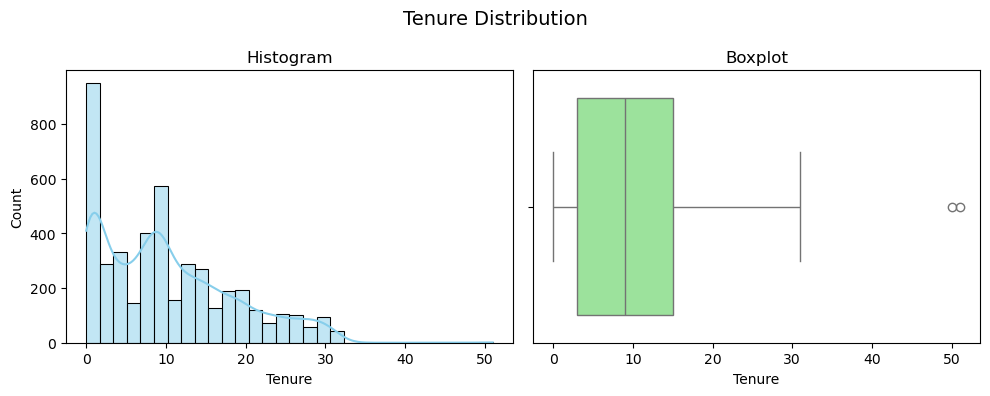

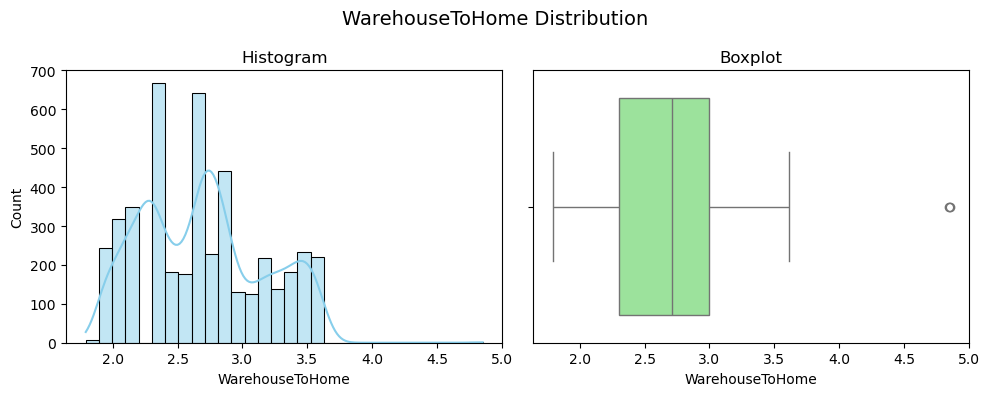

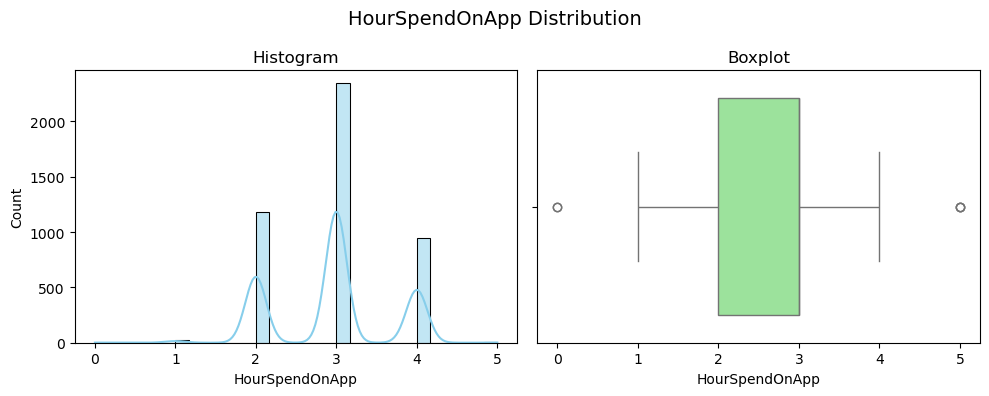

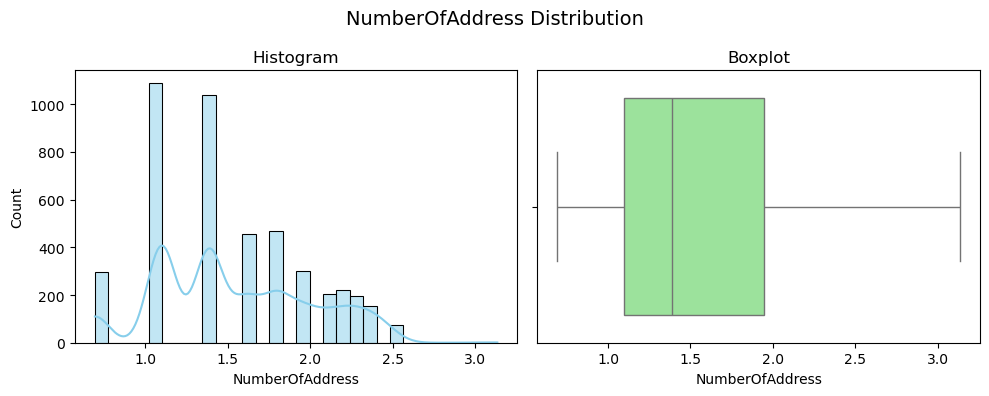

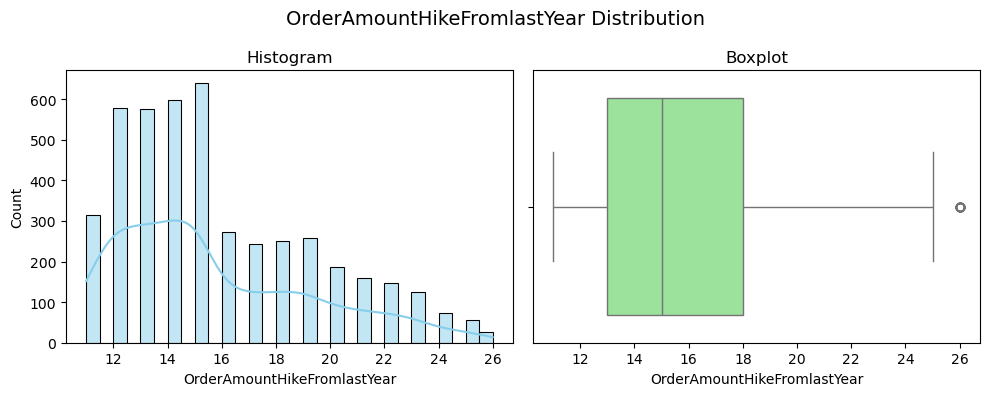

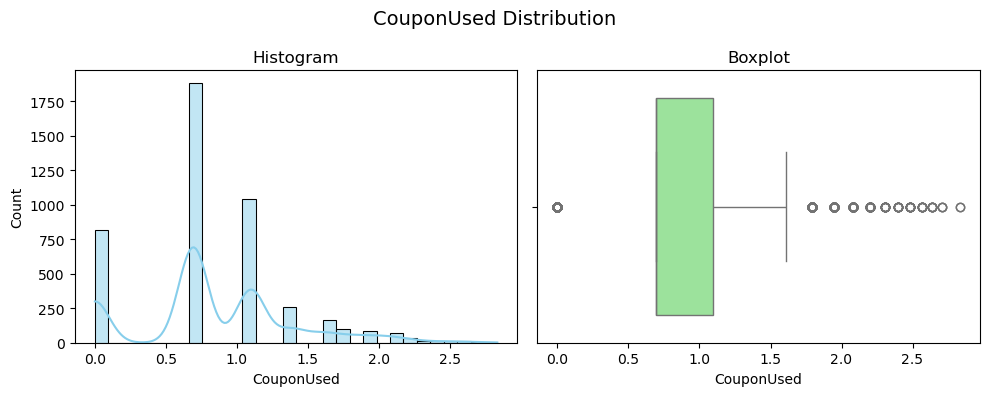

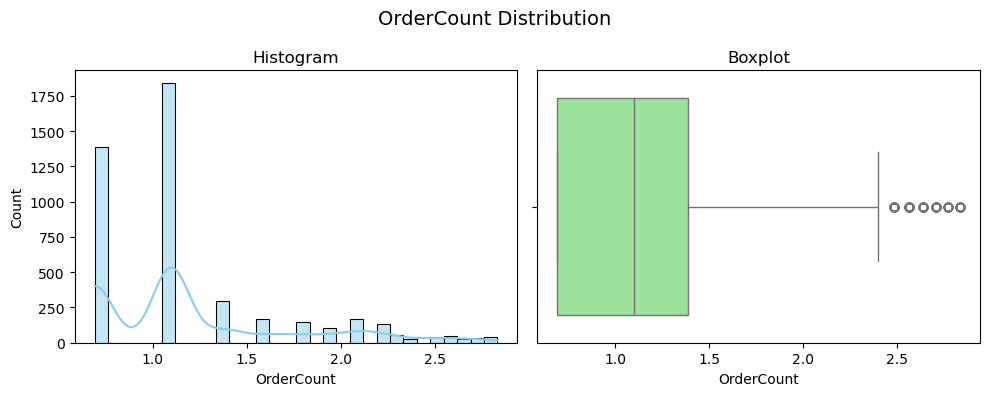

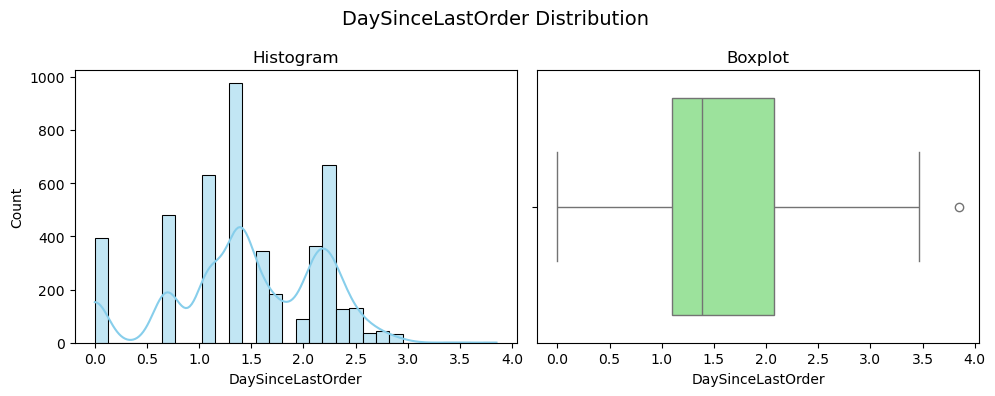

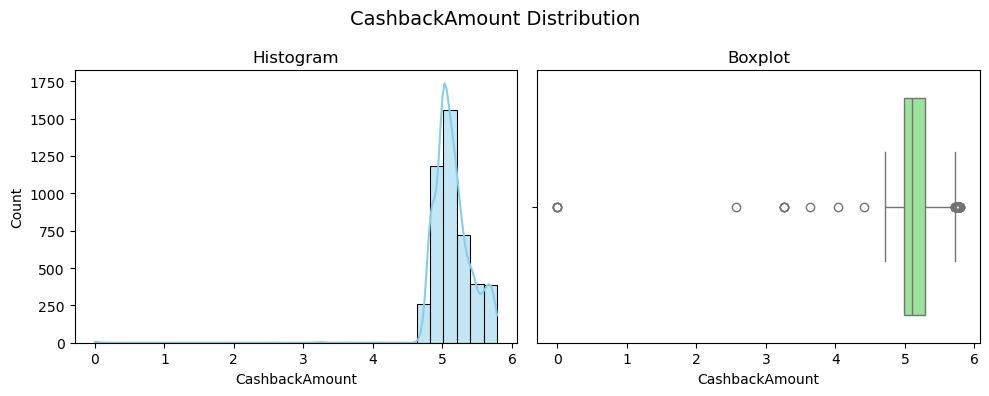

In [39]:
for col in numerical:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f'{col} Distribution', fontsize=14)
    
    # Histogram
    sns.histplot(df_full_train[col], bins=30, kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title('Histogram')
    
    # Boxplot
    sns.boxplot(x=df_full_train[col], ax=axes[1], color='lightgreen')
    axes[1].set_title('Boxplot')
    
    plt.tight_layout()
    plt.show()

**Categorical Features — Frequency, Cardinality, Visualization**

In [40]:
cat_summary = pd.DataFrame({
    'Unique Count': [df_full_train[col].nunique() for col in categorical],
    'Most Frequent': [df_full_train[col].mode()[0] for col in categorical],
    'Most Freq Count': [df_full_train[col].value_counts().iloc[0] for col in categorical]
}, index=categorical)
cat_summary

,Unique Count,Most Frequent,Most Freq Count
PreferredLoginDevice,2,Mobile Phone,3179
CityTier,3,1,2928
PreferredPaymentMode,5,Debit Card,1839
Gender,2,Male,2727
NumberOfDeviceRegistered,6,4,1897
PreferedOrderCat,5,Laptop & Accessory,1658
SatisfactionScore,5,3,1340
MaritalStatus,3,Married,2397
Complain,2,0,3214


**Categorical — Value Counts + Bar Chart**

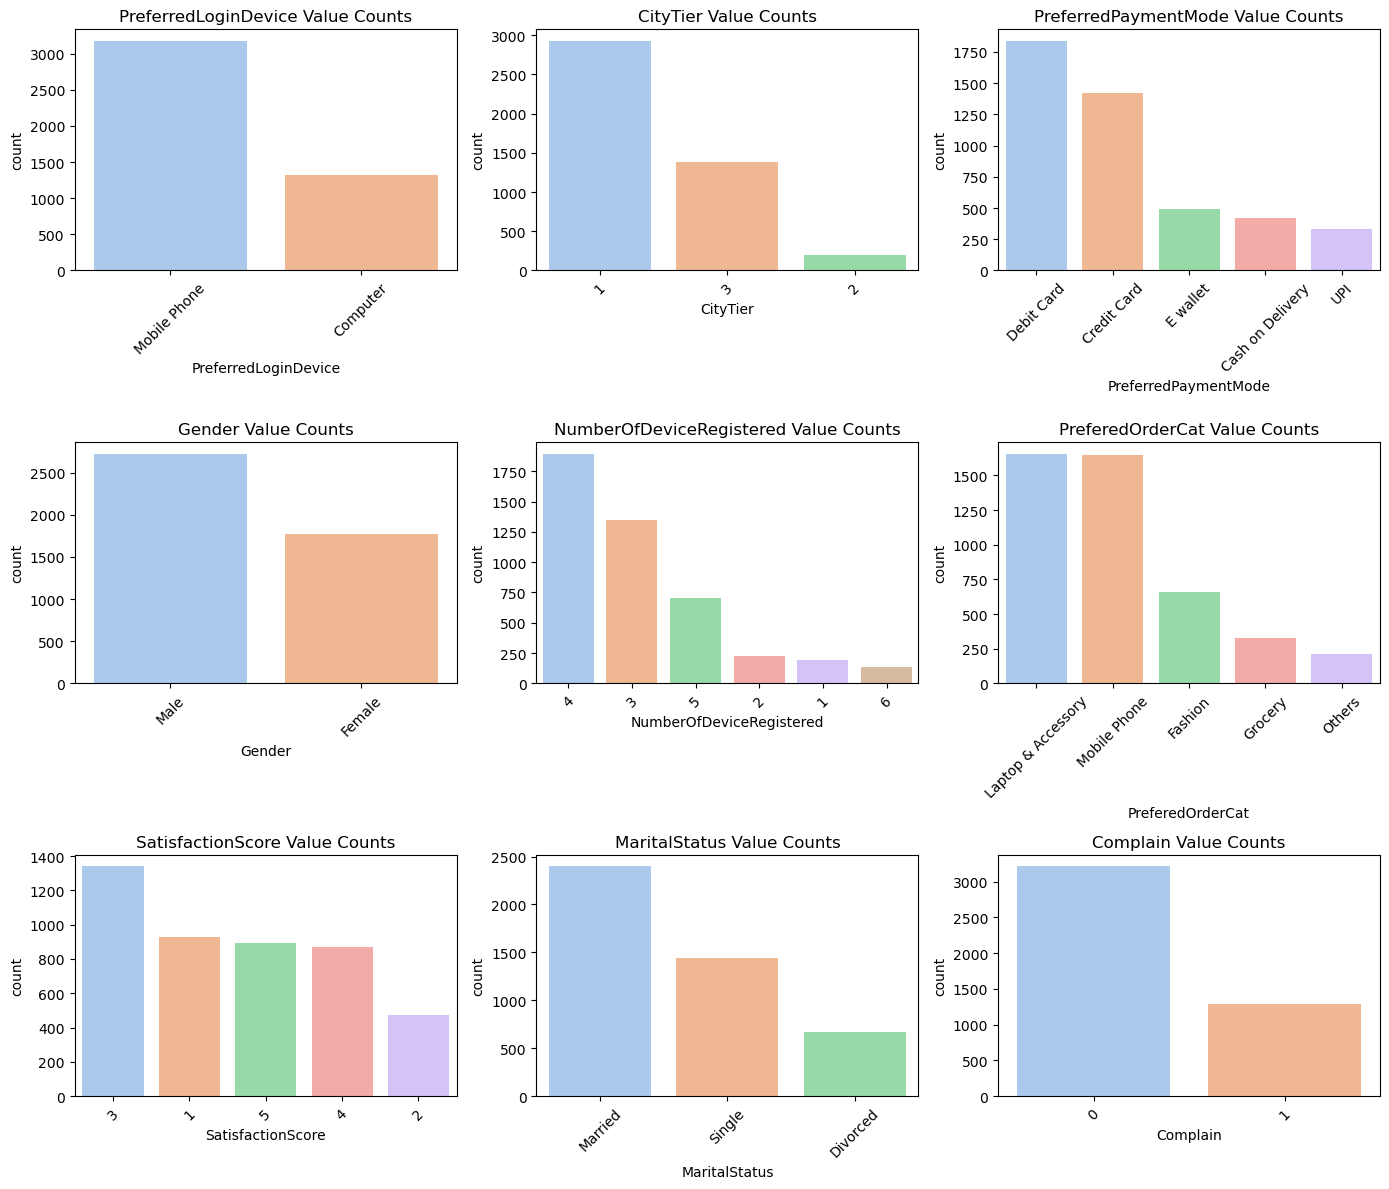

In [41]:
plt.figure(figsize=(14, 12))

for i, col in enumerate(categorical[:9], 1):
    plt.subplot(3, 3, i)
    order = df_full_train[col].value_counts().index  # sort by frequency
    sns.countplot(data=df_full_train, x=col, order=order, palette='pastel')
    plt.title(f'{col} Value Counts')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Bivariate Analysis (Target vs Feature)

### Categorical Features vs Target

**(a) Churn Rate by Category — Groupby + Bar Plot**

This helps to see which groups are more likely to churn.

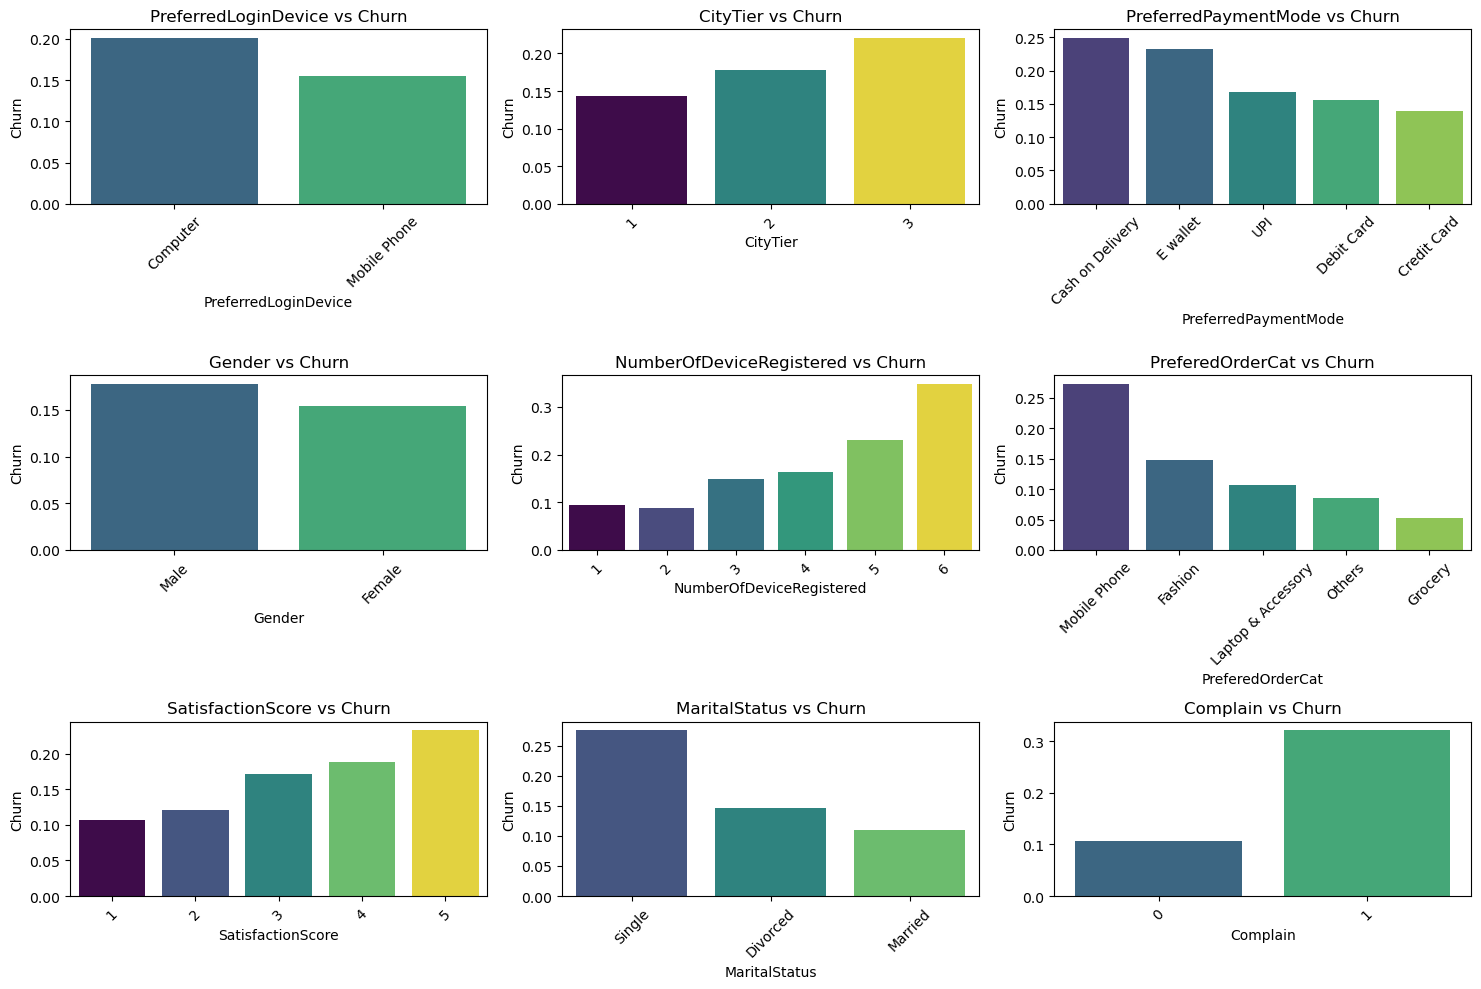

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical[:9]):
    churn_rate = df_full_train.groupby(col)[target].mean().sort_values(ascending=False).reset_index()
    sns.barplot(data=churn_rate, x=col, y=target, hue=col, dodge=False, legend=False, palette="viridis", ax=axes[i])
    axes[i].set_title(f"{col} vs {target}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**(b) Stacked Bar (Proportion of Churn by Category)**

This helps visualize the composition of churn (1) vs non-churn (0).

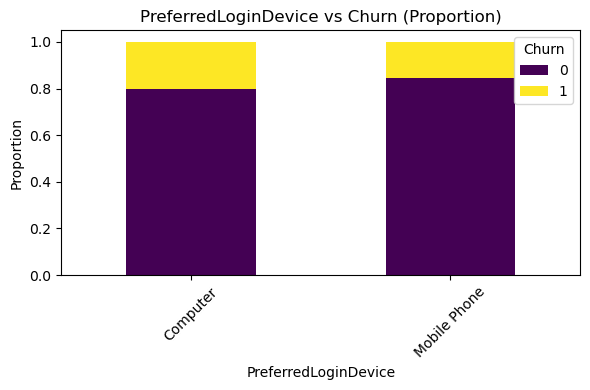

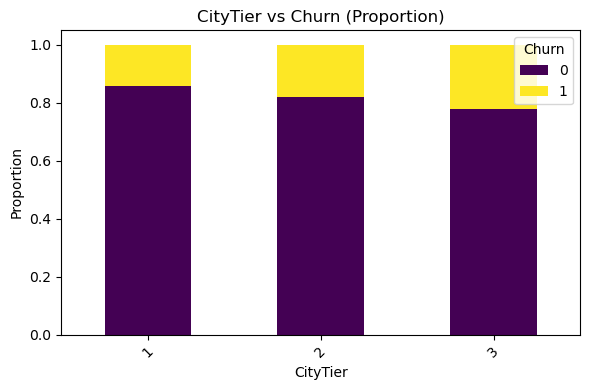

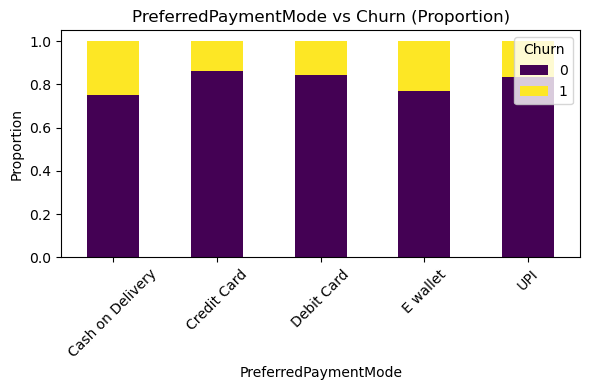

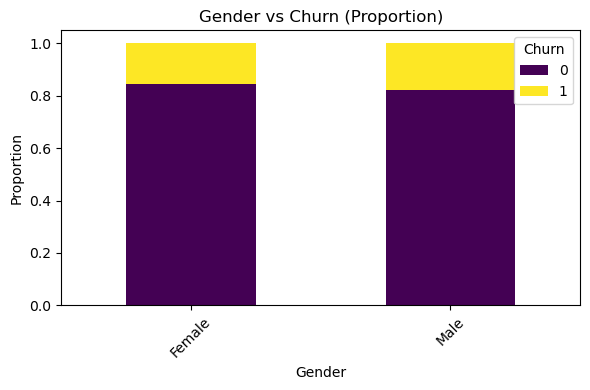

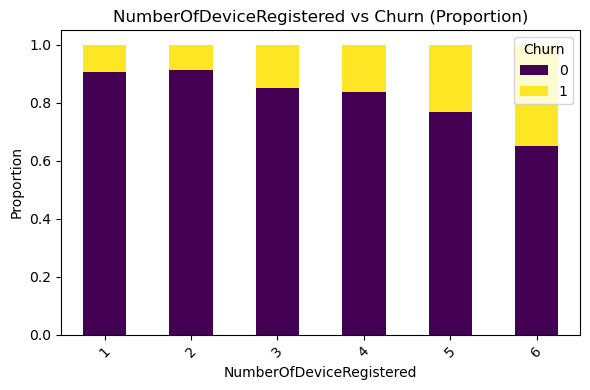

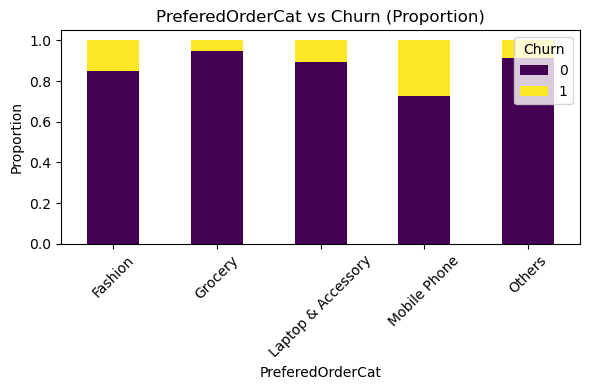

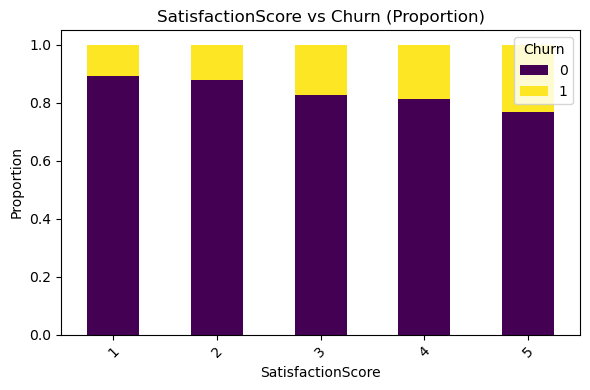

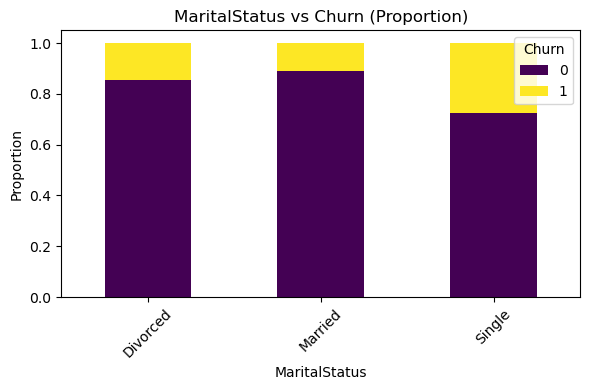

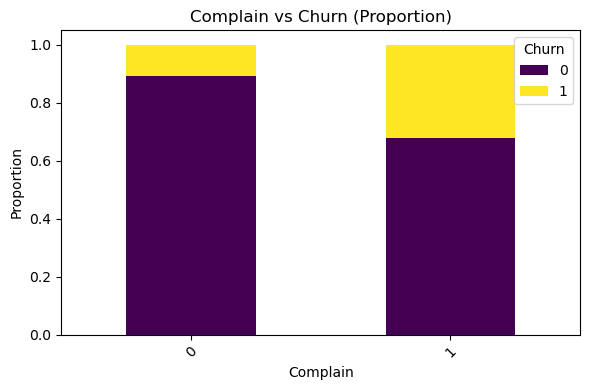

In [51]:
for col in categorical:
    cross_tab = pd.crosstab(df_full_train[col], df_full_train[target], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, figsize=(6,4), colormap='viridis')
    plt.title(f'{col} vs Churn (Proportion)')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

**(c) Chi-Square Test for Categorical Associations**

This checks if churn is statistically related to each categorical variable.

In [52]:
for col in categorical:
    table = pd.crosstab(df_full_train[col], df_full_train[target])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f'{col}: p-value = {p:.4f}')

PreferredLoginDevice: p-value = 0.0001
CityTier: p-value = 0.0000
PreferredPaymentMode: p-value = 0.0000
Gender: p-value = 0.0373
NumberOfDeviceRegistered: p-value = 0.0000
PreferedOrderCat: p-value = 0.0000
SatisfactionScore: p-value = 0.0000
MaritalStatus: p-value = 0.0000
Complain: p-value = 0.0000


**Interpretation:**

If p < 0.05, → there’s a statistically significant relationship between that categorical variable and churn.

If p ≥ 0.05, → no strong evidence of association.

### Numerical Features vs Target

**(a) Boxplot to Compare Distribution per Class**

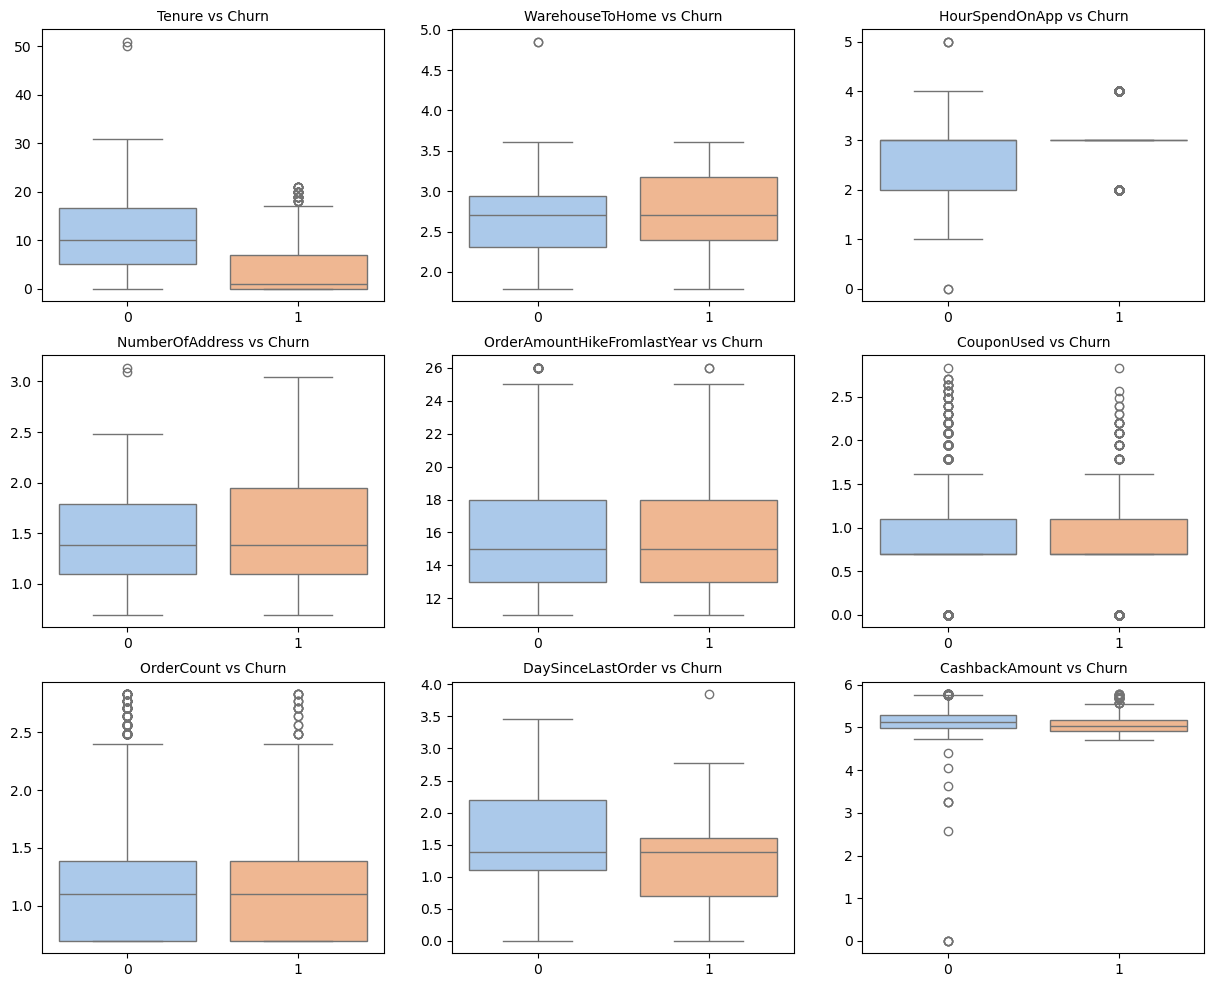

In [53]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(x=target, y=col, data=df_full_train, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col} vs Churn', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=0)

**(b) Correlation with Target**

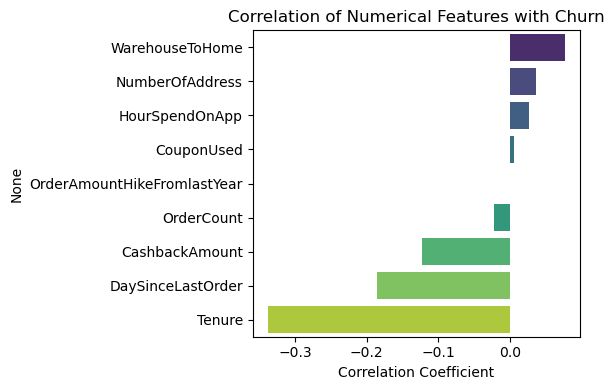

WarehouseToHome                0.076906
NumberOfAddress                0.036504
HourSpendOnApp                 0.026833
CouponUsed                     0.005460
OrderAmountHikeFromlastYear    0.000121
OrderCount                    -0.022331
CashbackAmount                -0.122829
DaySinceLastOrder             -0.186031
Tenure                        -0.338303
dtype: float64

In [54]:
corrs = df_full_train[numerical].corrwith(df_full_train[target])
corrs = corrs.sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=corrs.values, y=corrs.index, palette='viridis')
plt.title('Correlation of Numerical Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

corrs

**Interpretation:**

Positive correlation → higher feature values → higher churn chance

Negative correlation → higher feature values → lower churn chance

### 3. Multivariate Analysis

**Purpose:** Explore relationships among multiple numeric features and check for multicollinearity before modeling.

**1. Correlation Matrix Heatmap**

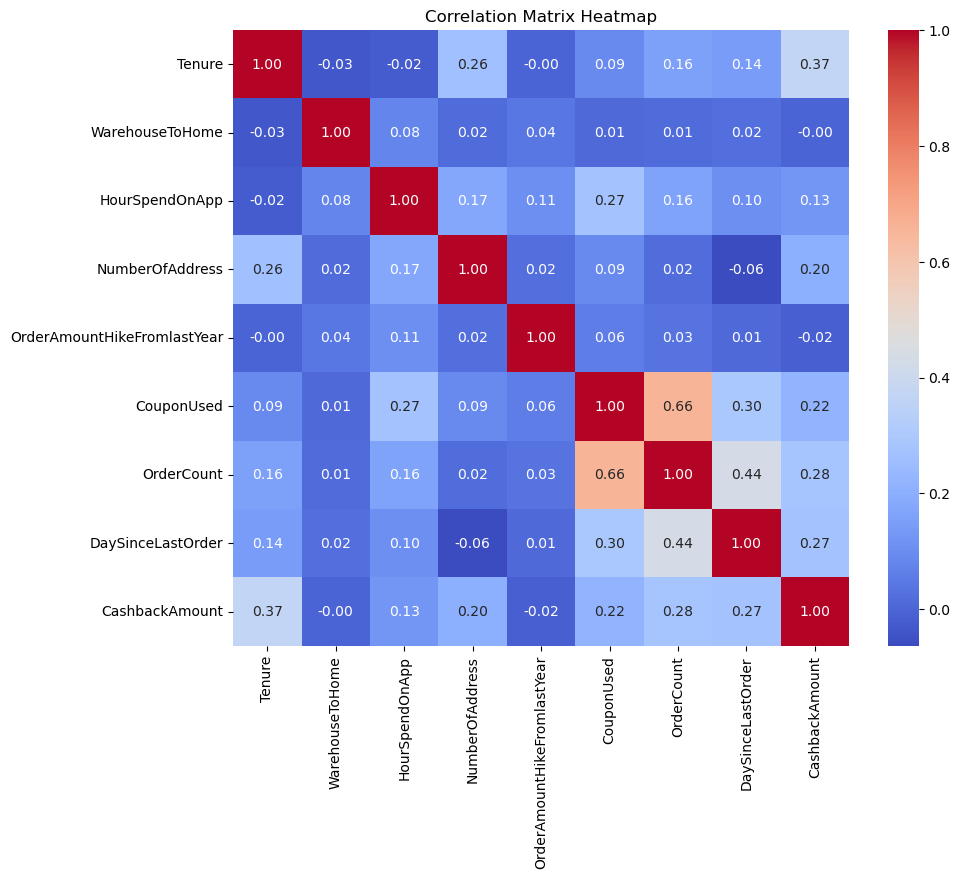

In [55]:
corr = df_full_train[numerical].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

### 4. Feature importance: Mutual information

In [58]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.Churn)

In [59]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

Complain                    0.030926
PreferedOrderCat            0.024401
MaritalStatus               0.019219
NumberOfDeviceRegistered    0.007549
SatisfactionScore           0.007144
PreferredPaymentMode        0.004685
CityTier                    0.004421
PreferredLoginDevice        0.001598
Gender                      0.000505
dtype: float64

## Step 4: One-hot encoding

In [60]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [61]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## Step 5: Baseline Model Training

In [62]:
def calculate_metrics(model, model_description, X_val, y_val):
    y_pred = model.predict(X_val)

    # metrics
    val_precision = precision_score(y_val, y_pred)
    val_recall = recall_score(y_val, y_pred)
    val_f1 = f1_score(y_val, y_pred)

    print(f'{model_description}:')
    print('---------------------')
    print(f' Precision: {val_precision:.4f}')
    print(f' Recall: {val_recall:.4f}')
    print(f' F1 Score: {val_f1:.4f}')
    print('')
    print('Classification Report')
    print('---------------------')
    print(classification_report(y_val, y_pred))
    print('Confusion Matrix')
    print('----------------')
    print(confusion_matrix(y_val, y_pred))
    
    return val_precision, val_recall, val_f1

In [63]:
def calculate_roc_auc(model, model_description, X_val, y_val):
    y_pred = model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred)
    
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_description}: ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc

**Logistic Regression**

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [65]:
calculate_metrics(lr, 'Logistic Regression', X_val, y_val)

Logistic Regression:
---------------------
 Precision: 0.7929
 Recall: 0.5842
 F1 Score: 0.6727

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       936
           1       0.79      0.58      0.67       190

    accuracy                           0.90      1126
   macro avg       0.86      0.78      0.81      1126
weighted avg       0.90      0.90      0.90      1126

Confusion Matrix
----------------
[[907  29]
 [ 79 111]]


(0.7928571428571428, 0.5842105263157895, 0.6727272727272727)

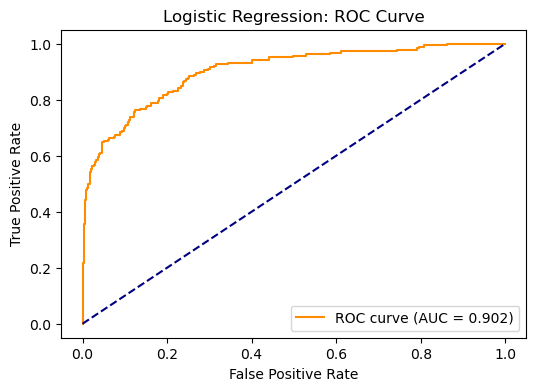

0.9019399460188933

In [69]:
calculate_roc_auc(lr, 'Logistic Regression', X_val, y_val)

**Decision Tree**

In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [71]:
calculate_metrics(dt, 'Decision Tree', X_val, y_val)

Decision Tree:
---------------------
 Precision: 0.7583
 Recall: 0.8421
 F1 Score: 0.7980

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       936
           1       0.76      0.84      0.80       190

    accuracy                           0.93      1126
   macro avg       0.86      0.89      0.88      1126
weighted avg       0.93      0.93      0.93      1126

Confusion Matrix
----------------
[[885  51]
 [ 30 160]]


(0.7582938388625592, 0.8421052631578947, 0.7980049875311721)

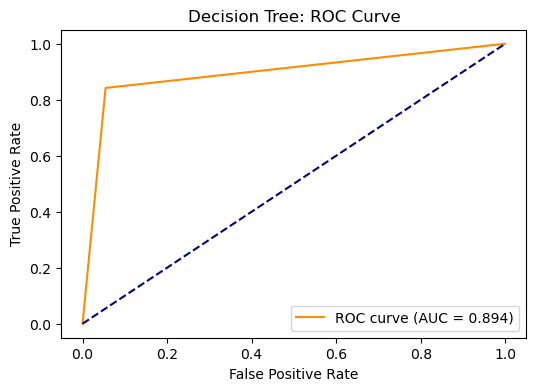

0.8938090418353576

In [72]:
calculate_roc_auc(dt, 'Decision Tree', X_val, y_val)

**Random Forest**

In [73]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [74]:
calculate_metrics(rf, 'Random Forest', X_val, y_val)

Random Forest:
---------------------
 Precision: 0.9448
 Recall: 0.8105
 F1 Score: 0.8725

Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       936
           1       0.94      0.81      0.87       190

    accuracy                           0.96      1126
   macro avg       0.95      0.90      0.92      1126
weighted avg       0.96      0.96      0.96      1126

Confusion Matrix
----------------
[[927   9]
 [ 36 154]]


(0.9447852760736196, 0.8105263157894737, 0.8725212464589235)

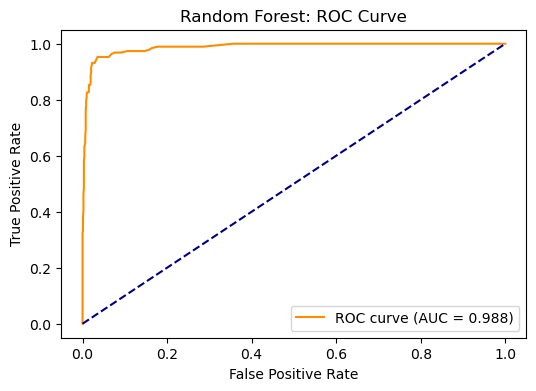

0.9875787224471435

In [75]:
calculate_roc_auc(rf, 'Random Forest', X_val, y_val)

## Step 6: Model Improvement

We are going to do hyperparameter tuning and training using cross-validation.

### Logistic Regression

In [76]:
scores = []

for C in [0.001, 0.01, 0.03, 0.05, 0.08, 0.1, 0.2]:
    lr = LogisticRegression(C=C, random_state=1)
    lr.fit(X_train, y_train)

    y_pred = lr.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((C, auc))

In [77]:
df_scores = pd.DataFrame(scores, columns=['C', 'auc'])

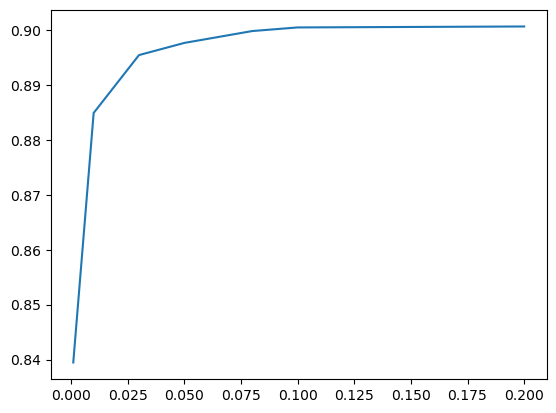

In [78]:
plt.plot(df_scores.C, df_scores.auc)

**Best C=0.125**

**Training Cross-Validation after Hyperparameter Tuning**

In [79]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

for train_idx, val_idx in kf.split(df_full_train):  
    df_train_kf = df_full_train.iloc[train_idx]
    df_val_kf = df_full_train.iloc[val_idx]

    y_train_kf = df_train_kf.Churn.values
    y_val_kf = df_val_kf.Churn.values

    dv = DictVectorizer(sparse=False)
    
    train_dicts_kf = df_train_kf[categorical + numerical].to_dict(orient='records')
    X_train_kf = dv.fit_transform(train_dicts_kf)
    
    val_dicts_kf = df_val_kf[categorical + numerical].to_dict(orient='records')   
    X_val_kf = dv.transform(val_dicts_kf)
    
    lr = LogisticRegression(C=0.125, random_state=1)
    lr.fit(X_train_kf, y_train_kf)
    
    y_pred_kf = lr.predict(X_val_kf)

    f1 = f1_score(y_val_kf, y_pred_kf)
    f1_scores.append(f1)

print("F1 scores:", f1_scores)
print("Mean F1:", np.mean(f1_scores))

F1 scores: [0.5799256505576208, 0.6795366795366795, 0.525, 0.5897435897435898, 0.6953125]
Mean F1: 0.613903683967578


### Decision Tree

**Hyperparameter Tuning**

In [80]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.759
   2 -> 0.830
   3 -> 0.862
   4 -> 0.879
   5 -> 0.894
   6 -> 0.905
  10 -> 0.883
  15 -> 0.911
  20 -> 0.905


In [97]:
scores = []

for depth in [6, 10, 15]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [98]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [99]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth            6      10     15
min_samples_leaf                     
1                 0.903  0.889  0.913
5                 0.904  0.922  0.941
10                0.893  0.908  0.915
15                0.891  0.919  0.925
20                0.884  0.912  0.915
100               0.872  0.882  0.882
200               0.856  0.862  0.862
500               0.826  0.826  0.826

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

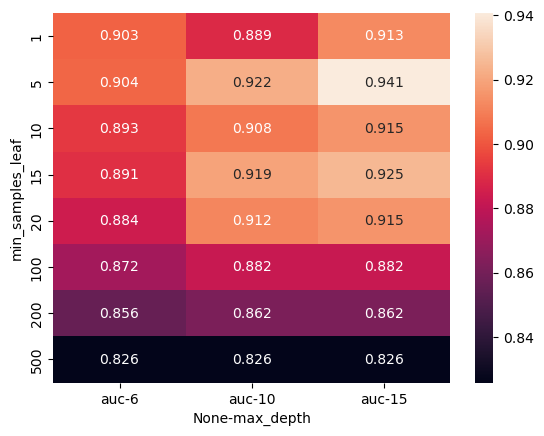

In [100]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

**Best max_depth=15 and min_samples_leaf=5**

In [101]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [102]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- Tenure <= 1.50
|   |--- Complain <= 0.50
|   |   |--- NumberOfAddress <= 1.70
|   |   |   |--- DaySinceLastOrder <= 0.90
|   |   |   |   |--- NumberOfAddress <= 1.24
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- NumberOfAddress >  1.24
|   |   |   |   |   |--- class: 1
|   |   |   |--- DaySinceLastOrder >  0.90
|   |   |   |   |--- DaySinceLastOrder <= 2.14
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DaySinceLastOrder >  2.14
|   |   |   |   |   |--- class: 0
|   |   |--- NumberOfAddress >  1.70
|   |   |   |--- NumberOfDeviceRegistered <= 4.50
|   |   |   |   |--- PreferedOrderCat=Mobile Phone <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- PreferedOrderCat=Mobile Phone >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- NumberOfDeviceRegistered >  4.50
|   |   |   |   |--- SatisfactionScore <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- SatisfactionScore >  3.50
|   |   |   |   |   |--- class: 1
|   |--- Complain >  0.50


**Training Cross-Validation after Hyperparameter Tuning**

In [103]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

for train_idx, val_idx in kf.split(df_full_train):  
    df_train_kf = df_full_train.iloc[train_idx]
    df_val_kf = df_full_train.iloc[val_idx]

    y_train_kf = df_train_kf.Churn.values
    y_val_kf = df_val_kf.Churn.values

    dv = DictVectorizer(sparse=False)
    
    train_dicts_kf = df_train_kf[categorical + numerical].to_dict(orient='records')
    X_train_kf = dv.fit_transform(train_dicts_kf)
    
    val_dicts_kf = df_val_kf[categorical + numerical].to_dict(orient='records')   
    X_val_kf = dv.transform(val_dicts_kf)
    
    dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
    dt.fit(X_train_kf, y_train_kf)
    
    y_pred_kf = rf.predict(X_val_kf)

    f1 = f1_score(y_val_kf, y_pred_kf)
    f1_scores.append(f1)

print("F1 scores:", f1_scores)
print("Mean F1:", np.mean(f1_scores))

F1 scores: [0.31313131313131315, 0.36649214659685864, 0.23333333333333334, 0.3728813559322034, 0.40425531914893614]
Mean F1: 0.33801869362852893


### Random Forest

**Hyperparameter Tuning**

In [104]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [105]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

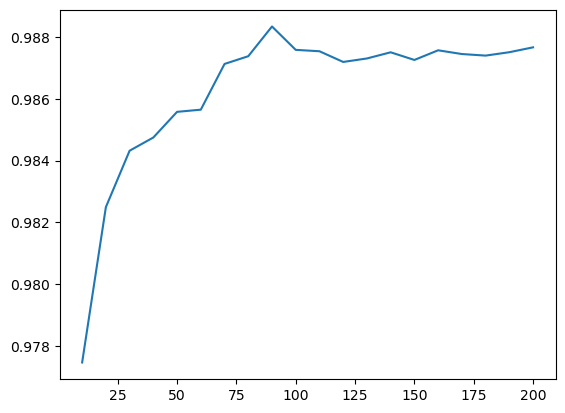

In [106]:
plt.plot(df_scores.n_estimators, df_scores.auc)

**Best n_estimators=90**

In [107]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [108]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

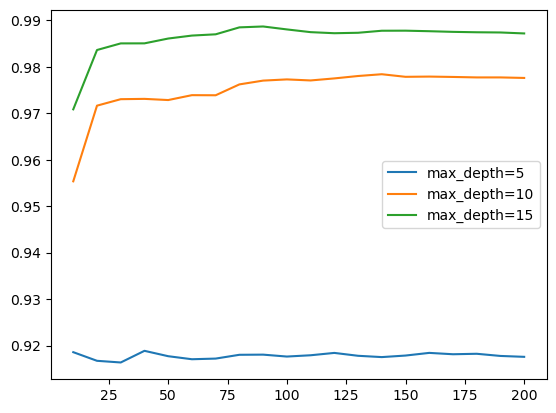

In [109]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

**Best max_depth=15**

In [110]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=15,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [111]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

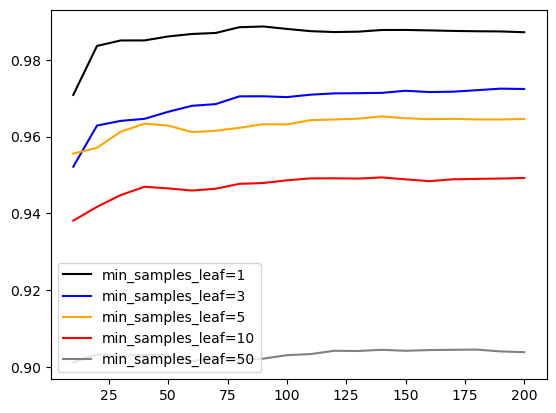

In [112]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

**Best min_samples_leaf=1**

**Training Cross-Validation after Hyperparameter Tuning**

In [113]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

for train_idx, val_idx in kf.split(df_full_train):  
    df_train_kf = df_full_train.iloc[train_idx]
    df_val_kf = df_full_train.iloc[val_idx]

    y_train_kf = df_train_kf.Churn.values
    y_val_kf = df_val_kf.Churn.values

    dv = DictVectorizer(sparse=False)
    
    train_dicts_kf = df_train_kf[categorical + numerical].to_dict(orient='records')
    X_train_kf = dv.fit_transform(train_dicts_kf)
    
    val_dicts_kf = df_val_kf[categorical + numerical].to_dict(orient='records')   
    X_val_kf = dv.transform(val_dicts_kf)
    
    rf = RandomForestClassifier(n_estimators=200,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=1)
    rf.fit(X_train_kf, y_train_kf)
    
    y_pred_kf = rf.predict(X_val_kf)

    f1 = f1_score(y_val_kf, y_pred_kf)
    f1_scores.append(f1)

print("F1 scores:", f1_scores)
print("Mean F1:", np.mean(f1_scores))

F1 scores: [0.882943143812709, 0.8785714285714286, 0.8058608058608059, 0.8838951310861424, 0.8529411764705882]
Mean F1: 0.8608423371603348


**Observation**

Random Forest model performs consistently across folds (good generalization).

## Step 7: Retrain on Full Training Data and Test using Test Data

In [114]:
full_train_dicts = df_full_train[categorical + numerical].to_dict(orient="records")
X_full_train = dv.fit_transform(full_train_dicts)

test_dicts = df_test[categorical + numerical].to_dict(orient="records")
X_test = dv.transform(test_dicts)

In [115]:
final_model = RandomForestClassifier(n_estimators=20,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=1)

final_model.fit(X_full_train, df_full_train.Churn.values)
    
pred_test = final_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, pred_test)

0.9908428924876294